1. Explore Keras datasets


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

MNIST Dataset

In [2]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [3]:
print("MNIST train shape:", xtrain.shape)

MNIST train shape: (60000, 28, 28)


In [4]:
print("MNIST test shape :", xtest.shape)

MNIST test shape : (10000, 28, 28)


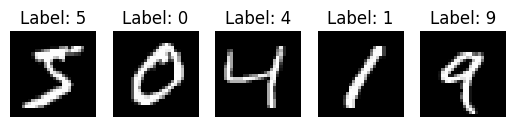

In [5]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f"Label: {ytrain[i]}")
    plt.axis('off')
plt.show()

CIFAR-10 Dataset

In [6]:
(xtrain1, ytrain1), (xtest1, ytest1) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
print("CIFAR-10 train shape:", xtrain1.shape)

CIFAR-10 train shape: (50000, 32, 32, 3)


In [8]:
print("Image Dimensions:", xtrain1[1].ndim)

Image Dimensions: 3


In [9]:
print("Data Type:", xtrain1[1].dtype)

Data Type: uint8


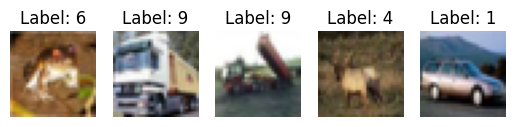

In [10]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(xtrain1[i])
    plt.title(f"Label: {ytrain1[i][0]}")
    plt.axis("off")
plt.show()

Fashion-MNIST Dataset

In [11]:
(xtrain2, ytrain2), (xtest2, ytest2) = keras.datasets.fashion_mnist.load_data()

In [12]:
print("Fashion-MNIST train shape:", xtrain2.shape)

Fashion-MNIST train shape: (60000, 28, 28)


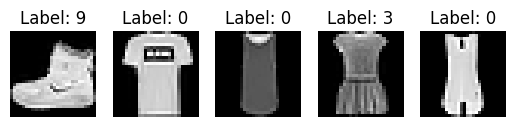

In [13]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(xtrain2[i], cmap='gray')
    plt.title(f"Label: {ytrain2[i]}")
    plt.axis("off")
plt.show()

2. Implement regression using DNN model for pizza price.

In [14]:
import pandas as pd

In [15]:
import pandas as pd
df = pd.read_csv('pizza_price.csv')
df.head()

,Restaurant,Extra_Cheeze,Extra_Mushroom,Size_Inch,Extra_Spicy,Price
0,A,1,1,12,0,650
1,B,0,1,15,1,800
2,C,0,0,9,0,500
3,D,1,0,12,1,700
4,E,1,0,12,1,750


In [16]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

target and features

In [17]:
x = df.drop(columns=['Restaurant','Price'])

In [18]:
x.head()

,Extra_Cheeze,Extra_Mushroom,Size_Inch,Extra_Spicy
0,1,1,12,0
1,0,1,15,1
2,0,0,9,0
3,1,0,12,1
4,1,0,12,1


In [20]:
y=df['Price']

Model Development

In [19]:
from keras.models import Sequential

In [21]:
from keras.layers import Dense, Activation, Dropout

In [22]:
model=Sequential()

In [23]:
from tensorflow import keras

In [24]:
model.add(keras.Input(shape=(4,)))

In [25]:
model.add(Dense(128,activation='relu'))

In [27]:
model.add(Dense(64,activation='relu'))

In [28]:
model.add(Dense(32,activation='relu'))

In [29]:
model.add(Dropout(rate=0.01))

In [30]:
model.add(Dense(16,activation='relu'))

In [31]:
model.add(Dropout(rate=0.01))

In [32]:
model.add(Dense(8,activation='relu'))

In [35]:
model.add(Dropout(rate=0.01))

In [36]:
model.add(Dense(4,activation='relu'))

In [37]:
model.add(Dense(1))

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,861 (61.96 KB)

 Trainable params: 15,861 (61.96 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
!pip install visualkeras

In [40]:
import visualkeras

Compile the model

In [41]:
model.compile(optimizer='adam',loss='mae',metrics=['mae'])

Training the Model

In [42]:
from keras.callbacks import ModelCheckpoint

In [43]:
checkpoint1=ModelCheckpoint('pizza_mpdel1.keras',monitor='mae',
save_best_only=True,verbose=2)

In [44]:
history1=model.fit(x,y,epochs=100,validation_split=0.2,batch_size=8,
verbose=2,callbacks=[checkpoint1])

Epoch 1/100

Epoch 1: mae improved from inf to 703.30182, saving model to pizza_mpdel1.keras
2/2 - 13s - 7s/step - loss: 703.3018 - mae: 703.3018 - val_loss: 825.1100 - val_mae: 825.1100
Epoch 2/100

Epoch 2: mae improved from 703.30182 to 703.22668, saving model to pizza_mpdel1.keras
2/2 - 1s - 344ms/step - loss: 703.2267 - mae: 703.2267 - val_loss: 824.9848 - val_mae: 824.9848
Epoch 3/100

Epoch 3: mae improved from 703.22668 to 703.08472, saving model to pizza_mpdel1.keras
2/2 - 1s - 327ms/step - loss: 703.0847 - mae: 703.0847 - val_loss: 824.8940 - val_mae: 824.8940
Epoch 4/100

Epoch 4: mae improved from 703.08472 to 703.03125, saving model to pizza_mpdel1.keras
2/2 - 1s - 321ms/step - loss: 703.0312 - mae: 703.0312 - val_loss: 824.8458 - val_mae: 824.8458
Epoch 5/100

Epoch 5: mae improved from 703.03125 to 702.95679, saving model to pizza_mpdel1.keras
2/2 - 1s - 379ms/step - loss: 702.9568 - mae: 702.9568 - val_loss: 824.6958 - val_mae: 824.6958
Epoch 6/100

Epoch 6: mae improve

In [45]:
his1=pd.DataFrame(history1.history)

In [46]:
his1.head()

,loss,mae,val_loss,val_mae
0,703.301819,703.301819,825.109985,825.109985
1,703.226685,703.226685,824.984802,824.984802
2,703.084717,703.084717,824.894043,824.894043
3,703.031250,703.031250,824.845764,824.845764
4,702.956787,702.956787,824.695801,824.695801


In [47]:
import matplotlib.pyplot as plt

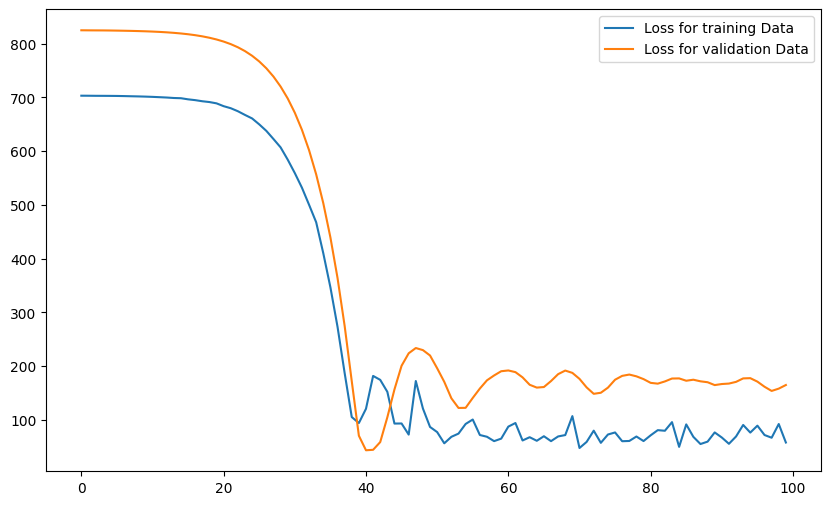

In [48]:
plt.figure(figsize=(10,6))
plt.plot(his1['loss'],label='Loss for training Data')
plt.plot(his1['val_loss' ],label='Loss for validation Data' )
plt.legend()

3. Implement regression using DNN model for diabetes data from sklearn.

In [49]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [50]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [51]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [52]:
x = df.drop(columns=['target'])

In [53]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [54]:
y = df['target']

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras

In [56]:
model = Sequential()

In [57]:
model.add(keras.Input(shape=(x.shape[1],)))

In [58]:
model.add(Dense(128, activation='relu'))

In [59]:
model.add(Dense(64, activation='relu'))

In [60]:
model.add(Dense(32, activation='relu'))

In [61]:
model.add(Dropout(0.01))

In [62]:
model.add(Dense(16, activation='relu'))

In [63]:
model.add(Dropout(0.01))

In [64]:
model.add(Dense(8, activation='relu'))

In [65]:
model.add(Dropout(0.01))

In [66]:
model.add(Dense(4, activation='relu'))

In [67]:
model.add(Dense(1))

In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,449 (48.63 KB)

 Trainable params: 12,449 (48.63 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [70]:
from keras.callbacks import ModelCheckpoint

In [71]:
checkpoint1 = ModelCheckpoint(
    'diabetes_model.keras', monitor='mae', save_best_only=True,verbose=2)

In [72]:
history1 = model.fit(
    x, y,epochs=100,
    validation_split=0.2,batch_size=8,verbose=2,callbacks=[checkpoint1])

Epoch 1/100

Epoch 1: mae improved from inf to 149.22687, saving model to diabetes_model.keras
45/45 - 3s - 61ms/step - loss: 149.2269 - mae: 149.2269 - val_loss: 144.0096 - val_mae: 144.0096
Epoch 2/100

Epoch 2: mae improved from 149.22687 to 96.82668, saving model to diabetes_model.keras
45/45 - 0s - 6ms/step - loss: 96.8267 - mae: 96.8267 - val_loss: 66.8448 - val_mae: 66.8448
Epoch 3/100

Epoch 3: mae improved from 96.82668 to 58.26665, saving model to diabetes_model.keras
45/45 - 0s - 5ms/step - loss: 58.2666 - mae: 58.2666 - val_loss: 58.7500 - val_mae: 58.7500
Epoch 4/100

Epoch 4: mae improved from 58.26665 to 52.04727, saving model to diabetes_model.keras
45/45 - 0s - 6ms/step - loss: 52.0473 - mae: 52.0473 - val_loss: 55.5392 - val_mae: 55.5392
Epoch 5/100

Epoch 5: mae improved from 52.04727 to 51.25119, saving model to diabetes_model.keras
45/45 - 0s - 6ms/step - loss: 51.2512 - mae: 51.2512 - val_loss: 52.5018 - val_mae: 52.5018
Epoch 6/100

Epoch 6: mae improved from 51.

In [73]:
his1 = pd.DataFrame(history1.history)

In [74]:
his1.head()

,loss,mae,val_loss,val_mae
0,149.226868,149.226868,144.009552,144.009552
1,96.826683,96.826683,66.844818,66.844818
2,58.266647,58.266647,58.749962,58.749962
3,52.047272,52.047272,55.539227,55.539227
4,51.251190,51.251190,52.501789,52.501789


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(his1['loss'], label='Loss for Training Data')
plt.plot(his1['val_loss'], label='Loss for Validation Data')
plt.xlabel("Epochs")
plt.ylabel("MAE Loss")
plt.legend()
plt.show()

4. Implement MNIST digit classification using tensorflow.

In [75]:
import tensorflow as tf

In [76]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.mnist.load_data()
xtrain.shape

(60000, 28, 28)

In [77]:
xtrain_scaled=tf.keras.utils.normalize(xtrain)

In [78]:
xtest_scaled=tf.keras.utils.normalize(xtest)

In [79]:
ytrain_encode=tf.keras.utils.to_categorical(ytrain)

In [80]:
ytest_encode=tf.keras.utils.to_categorical(ytest)

In [81]:
model4 = Sequential()

In [82]:
from keras.layers import Flatten,LeakyReLU

In [83]:
model4.add(Flatten(input_shape=(28,28)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
model4.add(Dense(128,activation='relu'))

In [85]:
model4.add(LeakyReLU(alpha=0.5))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [86]:
model4.add(Dropout(0.01))

In [87]:
model4.add(Dense(64,activation='relu'))

In [88]:
model4.add(LeakyReLU(negative_slope=0.5))

In [89]:
model4.add(Dropout(0.01))

In [90]:
model4.add(Dense(32,activation='relu'))

In [91]:
model4.add(LeakyReLU(negative_slope=0.5))

In [92]:
model4.add(Dropout(0.01))

In [93]:
model4.add(Dense(16,activation='relu'))

In [94]:
model4.add(LeakyReLU(negative_slope=0.5))

In [95]:
model4.add(Dense(10,activation='softmax'))

In [96]:
model4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [98]:
checkpoint4=ModelCheckpoint('mnist_digit.keras',monitor='accuracy',save_best_only=True,verbose=1)

In [99]:
history4=model4.fit(xtrain_scaled,ytrain_encode,validation_data=(xtest_scaled,ytest_encode),verbose=2,epochs=3)

Epoch 1/3
1875/1875 - 13s - 7ms/step - accuracy: 0.8937 - loss: 0.3513 - val_accuracy: 0.9561 - val_loss: 0.1455
Epoch 2/3
1875/1875 - 8s - 4ms/step - accuracy: 0.9617 - loss: 0.1288 - val_accuracy: 0.9671 - val_loss: 0.1097
Epoch 3/3
1875/1875 - 7s - 4ms/step - accuracy: 0.9720 - loss: 0.0930 - val_accuracy: 0.9694 - val_loss: 0.0986


In [100]:
his4=pd.DataFrame(history4.history)

In [101]:
his4.head()

,accuracy,loss,val_accuracy,val_loss
0,0.893683,0.351273,0.9561,0.145541
1,0.961650,0.128769,0.9671,0.109650
2,0.971983,0.093036,0.9694,0.098618


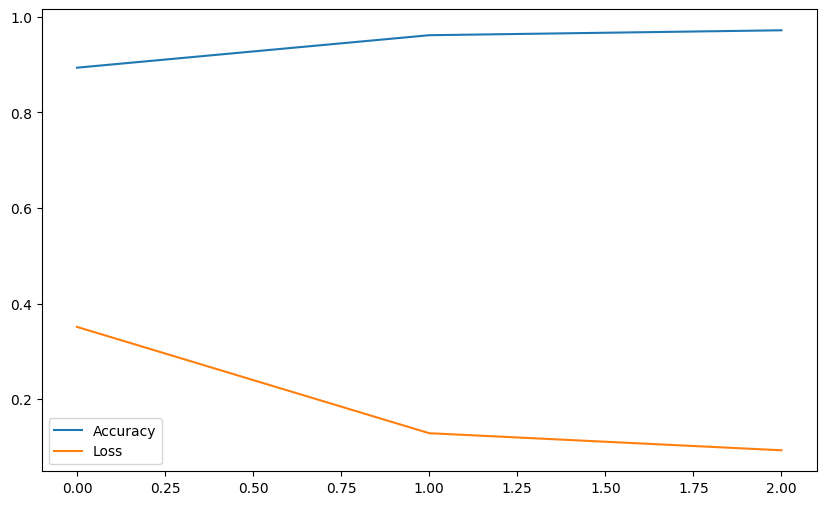

In [102]:
plt.figure(figsize=(10,6))
plt.plot(his4['accuracy'],label='Accuracy')
plt.plot(his4['loss'],label='Loss')
plt.legend()

In [103]:
predictions4=model4.predict(xtest_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [104]:
predictions4[1]

array([1.8449601e-08, 2.6036031e-04, 9.9969542e-01, 8.3927907e-06,
       1.4109134e-05, 8.9170126e-06, 1.5253167e-07, 8.0549589e-06,
       4.0875002e-06, 3.9858034e-07], dtype=float32)

In [105]:
import numpy as np
np.argmax(predictions4[1])

np.int64(2)

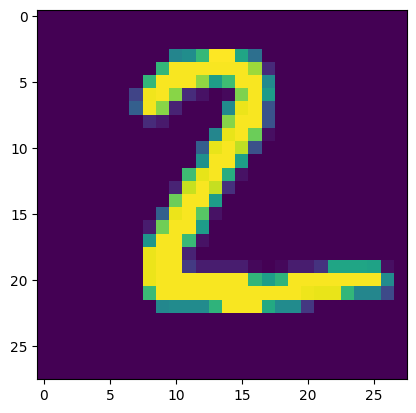

In [106]:
plt.imshow(xtest[1])

 5. Implement grid search on Fashion MNIST dataset and find optimal parameters.

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
import tensorflow as tf
from tensorflow import keras

In [109]:
(xtrain2, ytrain2), (xtest2, ytest2) = keras.datasets.fashion_mnist.load_data()
xtrain2_scaled=tf.keras.utils.normalize(xtrain2).astype('float32')

In [110]:
xtest2_scaled=tf.keras.utils.normalize(xtest2).astype('float32')

In [111]:
ytrain2_encode=tf.keras.utils.to_categorical(ytrain2)

In [112]:
ytest2_encode=tf.keras.utils.to_categorical(ytest2)

In [113]:
def create_model():
    model_fashion=Sequential()
    model_fashion.add(keras.Input(shape=(28,28,1)))
    model_fashion.add(Flatten())
    model_fashion.add(Dense(128,activation='relu'))
    model_fashion.add(Dense(64,activation='relu'))
    model_fashion.add(Dense(32,activation='relu'))
    model_fashion.add(Dense(16,activation='relu'))
    model_fashion.add(Dense(10,activation='softmax'))
    model_fashion.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model_fashion

In [114]:
!pip install scikeras

In [115]:
from scikeras.wrappers import KerasClassifier

In [116]:
model5=KerasClassifier(build_fn=create_model)

In [117]:
epochs=[3,5]
batch_size=[256]
param_grid=dict(epochs=epochs,batch_size=batch_size)

In [118]:
grid=GridSearchCV(estimator=model5,param_grid=param_grid,n_jobs=1)

In [119]:
grid_result=grid.fit(xtrain2_scaled,ytrain2_encode)

/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5658 - loss: 1.1924
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8215 - loss: 0.4902
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8446 - loss: 0.4241
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5346 - loss: 1.3600
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8025 - loss: 0.5408
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8388 - loss: 0.4470
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4808 - loss: 1.4780
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8121 - loss: 0.5325
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8312 - loss: 0.4557
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5394 - loss: 1.3487
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8051 - loss: 0.5244
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8382 - loss: 0.4341
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5640 - loss: 1.2329
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8139 - loss: 0.5050
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8391 - loss: 0.4383
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5574 - loss: 1.2700
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8018 - loss: 0.5294
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8319 - loss: 0.4541
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8478 - loss: 0.4160
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8565 - loss: 0.3859
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4911 - loss: 1.3722
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8138 - loss: 0.5267
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8400 - loss: 0.4405
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8505 - loss: 0.3973
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8631 - loss: 0.3677
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5022 - loss: 1.3308
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8091 - loss: 0.5220
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8420 - loss: 0.4310
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8531 - loss: 0.3930
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8643 - loss: 0.3645
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4941 - loss: 1.3579
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7995 - loss: 0.5631
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8306 - loss: 0.4767
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8463 - loss: 0.4237
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8581 - loss: 0.3849
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5273 - loss: 1.3192
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7974 - loss: 0.5471
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8313 - loss: 0.4646
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8459 - loss: 0.4200
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8589 - loss: 0.3834
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5802 - loss: 1.2883
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8236 - loss: 0.4936
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8472 - loss: 0.4175
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8610 - loss: 0.3787
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8700 - loss: 0.3514


In [120]:
grid_result.best_params_

{'batch_size': 256, 'epochs': 5}

6. Implement CIFAR10 data classification using CNN model.

In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
(xtrain1, ytrain1), (xtest1, ytest1) = cifar10.load_data()

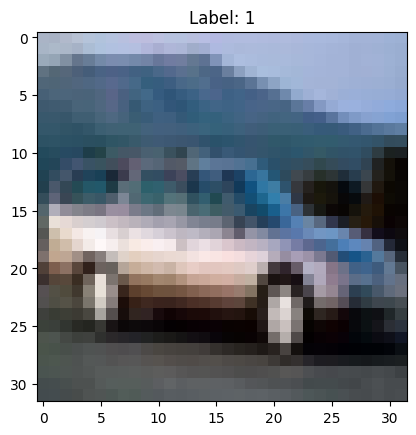

In [123]:
plt.imshow(xtrain1[4])
plt.title(f"Label: {ytrain1[4][0]}")
plt.show()

In [124]:
ytrain1_encode = to_categorical(ytrain1, num_classes=10)

In [125]:
ytest1_encode  = to_categorical(ytest1, num_classes=10)

In [126]:
batch_size = 128

In [127]:
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain1, ytrain1_encode))
train_dataset = train_dataset.map(lambda x, y: (tf.cast(x, tf.float32)/255.0, y))
train_dataset = train_dataset.shuffle(50000).batch(batch_size)

In [128]:
test_dataset = tf.data.Dataset.from_tensor_slices((xtest1, ytest1_encode))
test_dataset = test_dataset.map(lambda x, y: (tf.cast(x, tf.float32)/255.0, y))
test_dataset = test_dataset.batch(batch_size)

In [129]:
classifier = Sequential()

In [130]:
classifier.add(tf.keras.Input(shape=(32, 32, 3)))

In [131]:
classifier.add(Conv2D(32, (3,3), padding='same', activation='relu'))
classifier.add(LeakyReLU(negative_slope=0.5))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.05))

In [132]:
classifier.add(Conv2D(128, (3,3)))
classifier.add(LeakyReLU(negative_slope=0.5))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.05))

In [134]:
classifier.add(Flatten())
classifier.add(Dense(1024))
classifier.add(LeakyReLU(negative_slope=0.5))
classifier.add(Dropout(0.05))

In [135]:
classifier.add(Dense(10, activation='softmax'))

In [136]:
classifier.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,471,690 (24.69 MB)

 Trainable params: 6,471,690 (24.69 MB)

 Non-trainable params: 0 (0.00 B)

In [137]:
classifier.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [138]:
checkpoint5 = ModelCheckpoint('cifar10_model1.keras',monitor='accuracy',save_best_only=True,verbose=1)

In [139]:
history5 = classifier.fit( train_dataset,validation_data=test_dataset,epochs=5,verbose=2,callbacks=[checkpoint5])

Epoch 1/5

Epoch 1: accuracy improved from -inf to 0.49398, saving model to cifar10_model1.keras
391/391 - 192s - 492ms/step - accuracy: 0.4940 - loss: 1.4291 - val_accuracy: 0.6096 - val_loss: 1.1191
Epoch 2/5

Epoch 2: accuracy improved from 0.49398 to 0.63436, saving model to cifar10_model1.keras
391/391 - 175s - 448ms/step - accuracy: 0.6344 - loss: 1.0451 - val_accuracy: 0.6439 - val_loss: 1.0198
Epoch 3/5

Epoch 3: accuracy improved from 0.63436 to 0.67668, saving model to cifar10_model1.keras
391/391 - 206s - 526ms/step - accuracy: 0.6767 - loss: 0.9277 - val_accuracy: 0.6698 - val_loss: 0.9570
Epoch 4/5

Epoch 4: accuracy improved from 0.67668 to 0.71040, saving model to cifar10_model1.keras
391/391 - 203s - 518ms/step - accuracy: 0.7104 - loss: 0.8362 - val_accuracy: 0.6604 - val_loss: 0.9794
Epoch 5/5

Epoch 5: accuracy improved from 0.71040 to 0.72946, saving model to cifar10_model1.keras
391/391 - 174s - 446ms/step - accuracy: 0.7295 - loss: 0.7721 - val_accuracy: 0.6802 - 

In [140]:
loss, accuracy = classifier.evaluate(test_dataset)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.6810 - loss: 0.9005


In [141]:
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.9183, Test Accuracy: 0.6802


Text(0, 0.5, 'Loss/Accuracy')

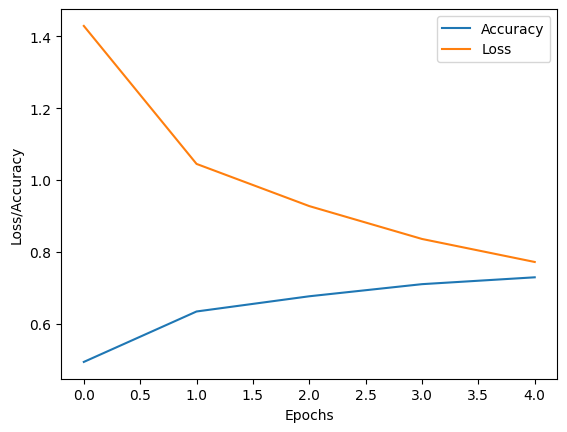

In [142]:
h5=pd.DataFrame(history5.history)
plt.plot(h5['accuracy'],label='Accuracy')
plt.plot(h5['loss'],label='Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')